<a href="https://colab.research.google.com/github/yhy0519/Machine_learning_of_R/blob/main/R04_01_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**■ 집합 연산자**

       오라클            vs              R
     1. union all                      rbind
     2. union                      rbind + unique
     3. intersect                    intersect
     4. minus                         setdiff


문제107. 아래의 SQL 의 결과를 R 로 구현하시오 !

SQL>

    select ename, sal, deptno
       from emp
       where deptno in (10, 20)
    union all
    select ename, sal, deptno
       from emp
       where deptno = 20;

R>

In [7]:
setwd('/content/data')
emp <- read.csv('emp3.csv')

rbind(emp[emp$deptno %in% c(10,20), c('ename', 'sal', 'deptno')],
      emp[emp$deptno == 20, c('ename', 'sal', 'deptno')])

,ename,sal,deptno
,<chr>,<int>,<int>
1,KING,5000,10
3,CLARK,2450,10
4,JONES,2975,20
10,FORD,3000,20
11,SMITH,800,20
12,SCOTT,3000,20
13,ADAMS,1100,20
14,MILLER,1300,10
41,JONES,2975,20


설명 : rbind 는 두개의 결과를 위아래로 묶어서 출력하는 함수


문제108. 아래의 SQL 을 R 로 구현하시오 !

SQL>

    select job, sum(sal)
       from emp
       group by job
    union all
    select null as job, sum(sal)
       from emp;

R>

In [10]:
rbind(aggregate(sal~job, emp, sum), c("" , sum(emp$sal)))

job,sal
<chr>,<chr>
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600
,29025


문제109. 아래의 SQL의 결과를 R 로 구현하시오 !

SQL>

    select ename, sal, deptno
       from emp
       where deptno in (10, 20)
    union
    select ename, sal, deptno
       from emp
       where deptno = 10;

설명: SQL 의 union 의 경우는 두 SQL 의 결과를 위아래로 연결하면서 첫번째 컬럼인	ename 을 기준으로 데이터를 정렬을 하고  
중복된 데이터를 제거합니다.

  union all 과 union 의 차이점 ?  
  1. 중복된 데이터를 제거
  2. 데이터를 정렬합니다.
		

In [11]:
x <- unique( rbind( emp[ emp$deptno %in% c(10,20), c("ename", "sal", "deptno") ],
                        emp[ emp$deptno==10, c("ename", "sal", "deptno") ] ) )

install.packages('doBy')
library(doBy)
orderBy( ~ename, x )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’, ‘pbkrtest’, ‘Deriv’




,ename,sal,deptno
,<chr>,<int>,<int>
13,ADAMS,1100,20
3,CLARK,2450,10
10,FORD,3000,20
4,JONES,2975,20
1,KING,5000,10
14,MILLER,1300,10
12,SCOTT,3000,20
11,SMITH,800,20


문제110. 아래의 SQL 의 결과를 R 로 구현하시오 !

SQL>

    select ename, sal, deptno
       from emp
       where deptno in (10, 20)
    minus
    select ename, sal, deptno
       from emp
       where deptno = 10;

R>

In [12]:
setdiff( emp[ emp$deptno %in% c(10, 20), c("ename", "sal", "deptno") ],
          emp[ emp$deptno==10, c("ename", "sal", "deptno") ] )

,ename,sal,deptno
,<chr>,<int>,<int>
1,KING,5000,10
3,CLARK,2450,10
4,JONES,2975,20
10,FORD,3000,20
11,SMITH,800,20
12,SCOTT,3000,20
13,ADAMS,1100,20
14,MILLER,1300,10


설명: R 에 내장되어있는 setdiff 함수를 사용하면 안되고 dplyr 패키지의 setdiff 를 이용해야 합니다.

In [13]:
install.packages("dplyr")
library(dplyr)

setdiff( emp[ emp$deptno %in% c(10, 20), c("ename", "sal", "deptno") ],
          emp[ emp$deptno==10, c("ename", "sal", "deptno") ] )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following object is masked from ‘package:doBy’:

    order_by


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ename,sal,deptno
<chr>,<int>,<int>
JONES,2975,20
FORD,3000,20
SMITH,800,20
SCOTT,3000,20
ADAMS,1100,20


설명: union 처럼 minus 도 데이터를 정렬을 하므로 정렬된 결과로 출력하시오 !


In [14]:
x <- setdiff( emp[ emp$deptno %in% c(10, 20), c("ename", "sal", "deptno") ],
                emp[ emp$deptno==10, c("ename", "sal", "deptno") ] )

library(doBy)
orderBy( ~ename, x )

,ename,sal,deptno
,<chr>,<int>,<int>
5,ADAMS,1100,20
2,FORD,3000,20
1,JONES,2975,20
4,SCOTT,3000,20
3,SMITH,800,20


문제111. 아래의 SQL 의 결과를 R 로 구현하시오 !

SQL>

    select ename, sal, deptno
       from emp
       where deptno in (10, 20)
    intersect
    select ename, sal, deptno
       from emp
       where deptno = 10;

R>

In [15]:
x <- intersect( emp[ emp$deptno %in% c(10, 20), c("ename", "sal", "deptno") ],
                   emp[ emp$deptno==10, c("ename", "sal", "deptno") ] )

library(doBy)
orderBy( ~ename, x )

,ename,sal,deptno
,<chr>,<int>,<int>
2,CLARK,2450,10
1,KING,5000,10
3,MILLER,1300,10


**■ SQL 의 서브쿼리를 R 로 구현하기**

** 오라클의 서브쿼리의 종류 3가지

 1. 단일행 서브쿼리
 2. 다중행 서브쿼리
 3. 다중 컬럼 서브쿼리


문제112. JONES 의 월급보다 더 많은 월급을 받는 사원들의 이름과 월급을 출력하시오 !

SQL>

    select ename, sal
       from emp
       where sal > ( select sal
                            from emp
                            where ename='JONES');

R>

In [17]:
jones_sal <- emp[ emp$ename=="JONES", c("sal") ]
jones_sal  # 2975
emp[ emp$sal > jones_sal, c("ename", "sal") ]

[1] 2975

,ename,sal
,<chr>,<int>
1,KING,5000
10,FORD,3000
12,SCOTT,3000


문제113. 아래의 SQL 을 R 로 구현하시오 !

SQL>

    select ename, sal
       from emp
       where sal = ( select max(sal)
                            from emp );

R>

In [22]:
emp[ emp$sal==max(emp$sal), c('ename', 'sal')]

,ename,sal
,<chr>,<int>
1,KING,5000


문제114. 전국에서 등록금이 가장 비싼 학교 이름과 등록금을 출력하시오 !  (데이터 : 전국_대학별등록금통계_현황.csv)


In [24]:
univ <- read.csv("전국_대학별등록금통계_현황.csv")
head(univ)

,구분,설립유형,학교명,본분교구분,입학금,수업료,기성회비,등록금
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,대학,사립,가야대학교,본교,0.0,5606.0,0,5606
2,대학,사립,가야대학교,제2캠퍼스,621.0,6670.5,0,6671
3,대학,사립,가천대학교,본교,878.3,8250.1,0,8250
4,대학,사립,가톨릭대학교,본교,880.0,6901.9,0,6902
5,대학,사립,가톨릭대학교,제2캠퍼스,880.0,8111.3,0,8111
6,대학,사립,가톨릭대학교,제3캠퍼스,880.0,6122.0,0,6122


In [25]:
univ_max <- max(univ$등록금)
univ[ univ$등록금==univ_max, c("학교명", "등록금")]

,학교명,등록금
,<chr>,<int>
86,명지대학교 자연캠퍼스,9117


문제115. KING 에게 보고하는 사원들의 이름과 월급을 출력하시오 !

SQL>

    select ename, sal
       from emp
       where mgr = (select empno
                            from emp
                            where ename='KING');

R>

In [29]:
king_empno <- emp[emp$ename=='KING', 'empno']
emp[emp$mgr==king_empno, c('ename', 'sal')]

,ename,sal
,<chr>,<int>
NA,NA,NA
2,BLAKE,2850
3,CLARK,2450
4,JONES,2975


In [31]:
# NA를 제거하려면 ? na.omit 을 사용

na.omit( emp[ emp$mgr==king_empno, c('ename', 'sal') ] )

,ename,sal
,<chr>,<int>
2,BLAKE,2850
3,CLARK,2450
4,JONES,2975


문제116. 관리자인 사원들의 이름을 출력하시오 !

SQL>

    select ename
       from emp
       where empno in (select mgr
                                 from emp);

설명: 관리자번호(mgr) 가 사원번호인 사원들을 출력

R>

In [34]:
emp[ emp$empno %in% emp$mgr, "ename" ]

[1] "KING"  "BLAKE" "CLARK" "JONES" "FORD"  "SCOTT"

In [36]:
install.packages('data.table')
library(data.table)
data.table( 이름=emp[ emp$empno %in% emp$mgr, "ename" ] )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




이름
<chr>
KING
BLAKE
CLARK
JONES
FORD
SCOTT


문제117. 관리자가 아닌 사원들의 이름을 출력하시오 !

SQL>

    select ename
       from emp
       where empno not in (select mgr
                                      from emp
                                      where mgr in not null);

R>

In [37]:
library(data.table)
data.table( 이름=emp[ ! emp$empno %in% emp$mgr, "ename" ] )

이름
<chr>
MARTIN
ALLEN
TURNER
JAMES
WARD
SMITH
ADAMS
MILLER


문제118. 아파트에서 가장 많이 발생하는 범죄유형이 무엇인지 출력하시오 !
		(crime_loc.csv 를 사용)

In [40]:
crime_loc <- read.csv("crime_loc.csv")
x <- crime_loc[ crime_loc$장소=="아파트", c("범죄", "건수") ]
x[ x$건수==max(x$건수), ]

,범죄,건수
,<chr>,<int>
1,절도,25389


문제119. 지하철에서 가장 많이 발생하는 범죄유형이 무엇인지 출력하시오 !


In [41]:
x <- crime_loc[ crime_loc$장소=="지하철", c("범죄", "건수") ]
x[ x$건수==max(x$건수), ]

,범죄,건수
,<chr>,<int>
176,강간,1339


문제120. 지하철에서 발생하는 범죄유형과 건수를 출력하는데 건수가 높은것부터 출력하시오 !


In [43]:
crime_loc <- read.csv("crime_loc.csv")
x <- crime_loc[ crime_loc$장소=="지하철", c("범죄", "건수") ]
library(doBy)
orderBy( ~-건수, x )

,범죄,건수
,<chr>,<int>
176,강간,1339
14,절도,737
203,폭행,508
230,상해,188
365,폭력행위등처벌에관한법률위반,70
68,손괴,41
446,과실치사상,28
284,공갈,12
41,장물,8


문제121. 위의 결과에서 첫번째 행만 출력하시오 !


In [44]:
crime_loc <- read.csv("crime_loc.csv")
x <- crime_loc[ crime_loc$장소=="지하철", c("범죄", "건수") ]
library(doBy)
x2 <- orderBy( ~-건수, x )
x2[1,]

,범죄,건수
,<chr>,<int>
176,강간,1339


문제122. 문제120번 결과에서 첫번째 행부터 세번째 행까지 출력하시오 !


In [45]:
crime_loc <- read.csv("crime_loc.csv")
x <- crime_loc[ crime_loc$장소=="지하철", c("범죄", "건수") ]
library(doBy)
x2 <- orderBy( ~-건수, x )
x2[c(1:3),]

,범죄,건수
,<chr>,<int>
176,강간,1339
14,절도,737
203,폭행,508


문제123. 강력범죄가 가장 많이 발생하는 요일은 언제인가 ?
		(crime_day.csv를 이용)

In [46]:
crime_day <- read.csv("crime_day.csv")
crime_day[ crime_day$C_C=="강력범죄", ]

C_C,C_T,DAY,CNT
<chr>,<chr>,<chr>,<int>


설명: trimws 함수 ---> 양쪽 공백 제거하는 함수


In [47]:
x <- crime_day[ trimws(crime_day$C_C)=="강력범죄", ]
library(doBy)
x2 <- orderBy( ~-CNT, x )
x2[ 1, "DAY" ]

[1] "SAT"

문제124. 살인기수가 많이 발생하는 요일을 1위부터 3위까지 출력하시오


In [52]:
x <- crime_day[ trimws(crime_day$C_T)=="살인기수", ] 
# crime_day중 C_T  컬럼에서 `살인기수' 에 해당하는 값들만 출력 
# 자료양측에 있을 공백을 제거(trimws)

library(doBy)      # doBy 패키지 사용
x2 <- orderBy( ~-CNT, x )   # CNT(건수) 크기가 큰 순으로 정렬하여 x2에 담는다.
x2[ c(1:3), "DAY" ]   # x2에 담은 값에서 1~3 행만, 그중에서 "DAY"에 해당하는 값만 출력한다.

[1] "MON" "WED" "TUE"

**■ R 에서 순위를 출력하는 방법** 

문법:  rank 함수 

예제:  이름, 월급,  월급에 대한 순위를 출력하시오 !

In [54]:
data.table( 이름=emp$ename, 월급=emp$sal, 순위= rank(-emp$sal, ties.method="min")  )

이름,월급,순위
<chr>,<int>,<int>
KING,5000,1
BLAKE,2850,5
CLARK,2450,6
JONES,2975,4
MARTIN,1250,10
ALLEN,1600,7
TURNER,1500,8
JAMES,950,13
WARD,1250,10


설명: rank 에 마이너스(-)를 사용하면 월급이 높은것부터 출력됩니다.


ties.method 옵션:    
  1. min : 오라클의 rank 와 같다
  2. first : 오라클의 rank 와 같은데 순위가 같은 데이터가 있으면 인덱스 순서가 먼저 나온 데이터를 높은 순위로 부여합니다.
  3. max : 2등이 두명이면 둘 다 3등으로 출력합니다.
	

In [55]:
x <- data.table( 이름=emp$ename, 월급=emp$sal, 순위=rank(-emp$sal, ties.method="min") )
library(doBy)
orderBy( ~ 순위, x )

,이름,월급,순위
,<chr>,<int>,<int>
1,KING,5000,1
10,FORD,3000,2
12,SCOTT,3000,2
4,JONES,2975,4
2,BLAKE,2850,5
3,CLARK,2450,6
6,ALLEN,1600,7
7,TURNER,1500,8
14,MILLER,1300,9


※ 오라클의 dense_rank 와 같은 함수는 무엇인가 ?

SQL>

    select ename, sal, dense_rank() over (order by sal desc) 순위
       from emp;

R>

In [58]:
library(dplyr)
x <- data.table( 이름=emp$ename, 월급=emp$sal, 순위=dense_rank(-emp$sal) )
library(doBy)
orderBy( ~ 순위, x )

,이름,월급,순위
,<chr>,<int>,<int>
1,KING,5000,1
10,FORD,3000,2
12,SCOTT,3000,2
4,JONES,2975,3
2,BLAKE,2850,4
3,CLARK,2450,5
6,ALLEN,1600,6
7,TURNER,1500,7
14,MILLER,1300,8


 문제125. 월요일에 많이 발생하는 범죄, 건수, 순위를 출력하시오 ~~ (crime_day.csv)


In [59]:
library(dplyr)
library(doBy)
crime_day <- read.csv("crime_day.csv")
c_mon <- crime_day[ crime_day$DAY=="MON", ]
x <- data.table( 범죄=c_mon$C_T, 건수=c_mon$CNT,
                순위=dense_rank(-c_mon$CNT) )
orderBy( ~ 순위, x )

,범죄,건수,순위
,<chr>,<int>,<int>
23,사기,46295,1
10,폭행,16191,2
16,손괴,7586,3
9,상해,7402,4
24,횡령,5489,5
14,폭력행위등,5280,6
26,성풍속범죄,3094,7
21,문서?인장,3002,8
6,강제추행,1999,9


문제126. 여자들이 많이 걸리는 암과 그 건수와 순위를 출력하시오 !
		( 암종이 모든암은 제외하는 조건을 주세요 ~)  
		( cancer2.csv 를 사용하세요 )

In [64]:
cancer2 <- read.csv("cancer2.csv")
head(cancer2)

,암종,국제질병분류코드,환자수,성별,조유병률_10만_1명,암상대생존율_5Y_PC
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,구강및인두,C00-C14,17024,남녀전체,33.8,62.2
2,식도,C15,7444,남녀전체,14.8,31.7
3,위,C16,207145,남녀전체,411.4,71.5
4,대장,C18-C20,173459,남녀전체,344.5,74.8
5,간,C22,51402,남녀전체,102.1,30.1
6,담낭 및 기타담도,C23-C24,14778,남녀전체,29.4,28.3


In [65]:
unique(cancer2$암종)

[1] "구강및인두"       "식도"             "위"               "대장"            
 [5] "간"               "담낭 및 기타담도" "췌장"             "후두"            
 [9] "폐"               "유방"             "자궁경부"         "자궁체부"        
[13] "난소"             "전립선"           "고환"             "신장"            
[17] "방광"             "뇌 및 중추신경계" "갑상선"           "호지킨림프종"    
[21] "비호지킨림프종"   "다발성 골수종"    "백혈병"           "기타 암"         
[25] "모든암"

In [66]:
unique(cancer2$성별)

[1] "남녀전체" "남자"     "여자"

In [67]:
c <- cancer2[ cancer2$성별=='여자' & cancer2$암종!="모든암",]
head(c)

,암종,국제질병분류코드,환자수,성별,조유병률_10만_1명,암상대생존율_5Y_PC
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
50,구강및인두,C00-C14,5523,여자,22.0,73.9
51,식도,C15,730,여자,2.9,37.4
52,위,C16,69490,여자,276.2,70.0
53,대장,C18-C20,69971,여자,278.1,71.8
54,간,C22,12968,여자,51.5,29.3
55,담낭 및 기타담도,C23-C24,7246,여자,28.8,27.2


In [70]:
x <- data.table( 암종=c$암종, 환자수=c$환자수, 순위=dense_rank(-c$환자수) )
x2 <- orderBy( ~순위, x)
x3 <- unique(x2)
x3

암종,환자수,순위
<chr>,<int>,<int>
갑상선,217874,1
유방,131581,2
대장,69971,3
위,69490,4
자궁경부,43523,5
기타 암,37312,6
폐,19058,7
자궁체부,15191,8
난소,14171,9


**■ R 로 막대그래프 그리기**

 "머신러닝 수업때와 케글에 데이터 분석시 사용하기 편하도록 함수로 만들어서 그래프 그리는것을 자동화 시키기"



문제127. emp 테이블의 월급으로 기본적인 막대 그래프를 그리시오 !


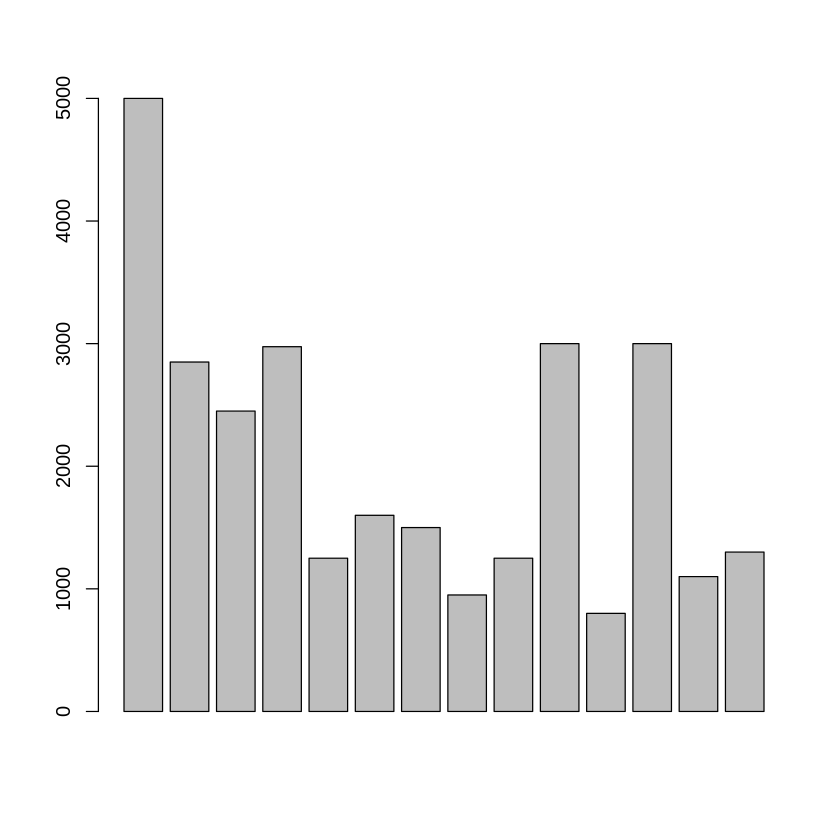

In [71]:
barplot(emp$sal)

문제128. 위의 그래프의 제목을 Salary Bar Chart 라고 이름을 붙이시오 !


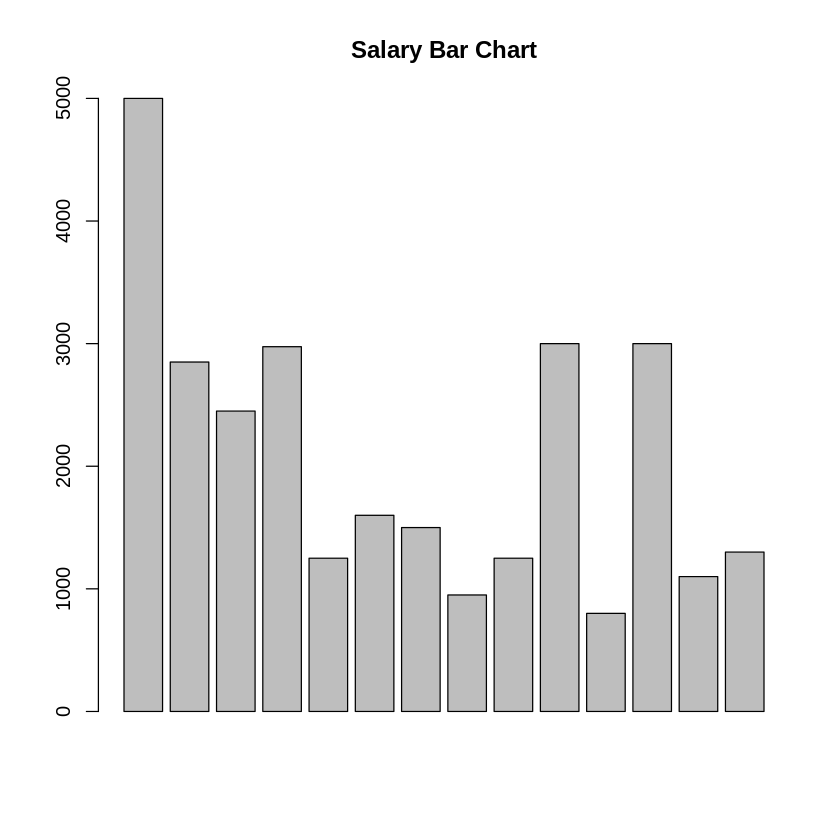

In [72]:
barplot(emp$sal, main="Salary Bar Chart")

문제129. 막대 그래프 x 축에 사원 이름을 붙이시오 !


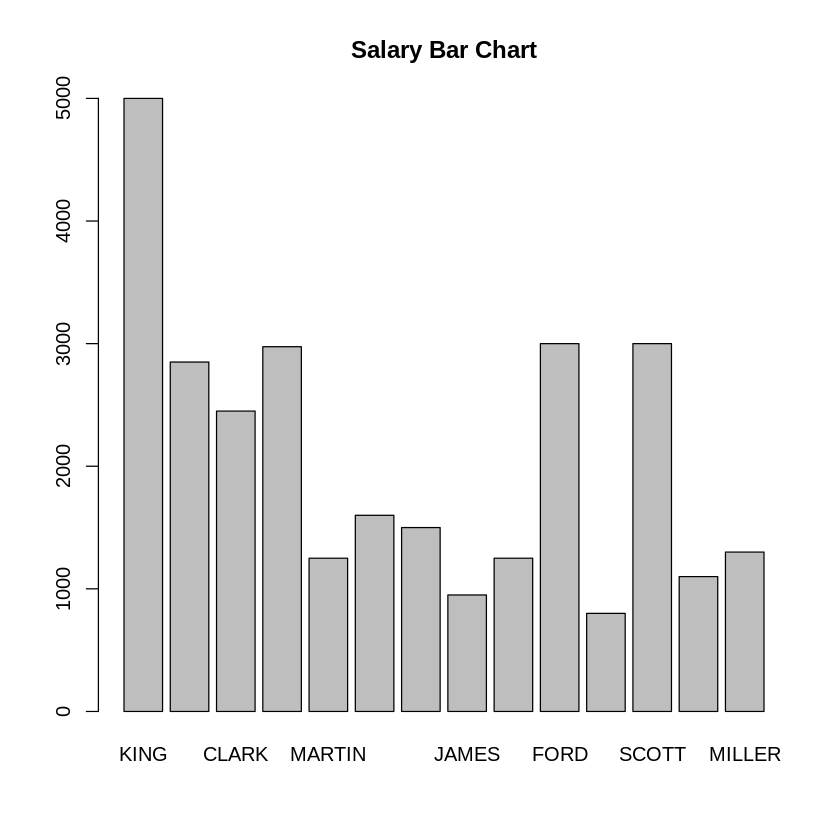

In [73]:
barplot(emp$sal, main="Salary Bar Chart", names.arg=emp$ename)

문제130. 막대 그래프의 x축과 y축의 이름을 각각 Name, Salary 라고 하시오 !




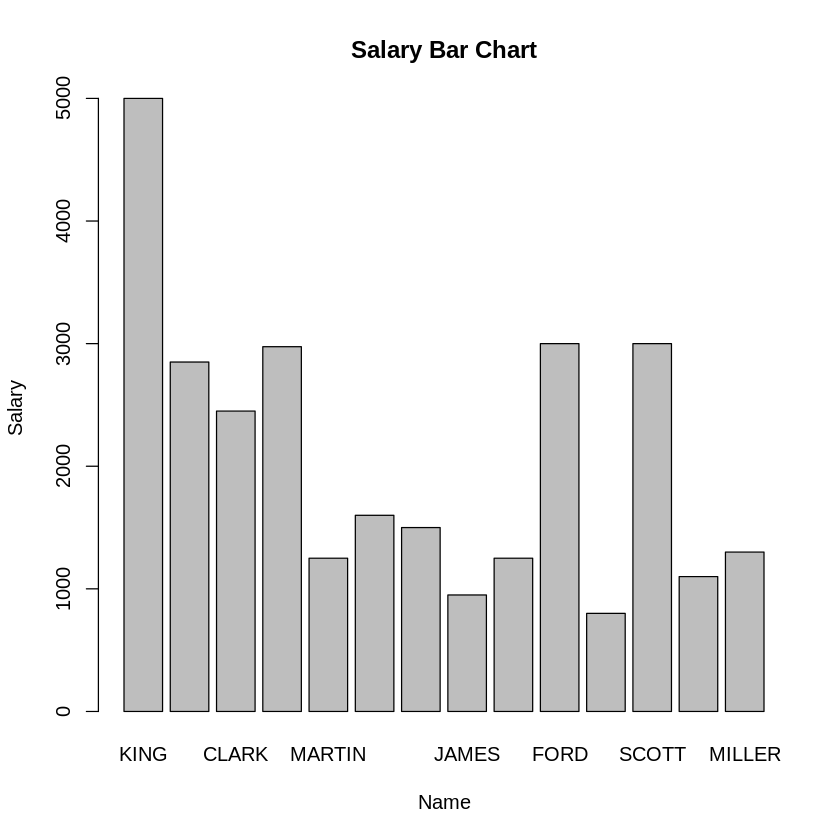

In [75]:
barplot(emp$sal, main="Salary Bar Chart", names.arg=emp$ename,
           xlab="Name", ylab="Salary")

문제131. 막대 그래프의 색깔을 Green Yellow 색으로 출력하시오 !


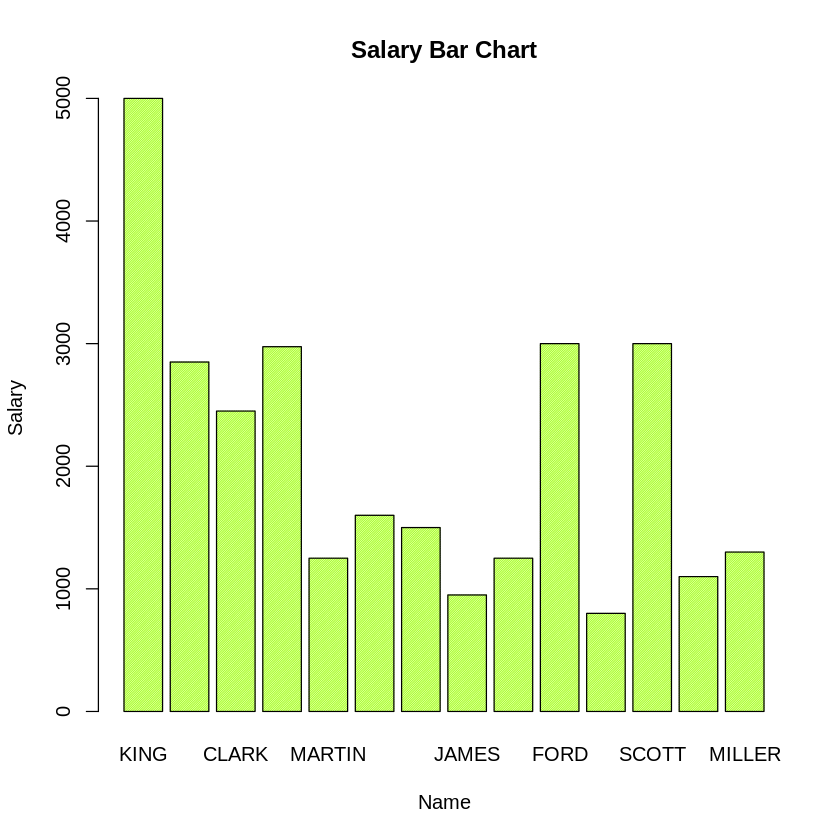

In [78]:
barplot(emp$sal, main="Salary Bar Chart", names.arg=emp$ename,
           xlab="Name", ylab="Salary", col='Green Yellow', density=80)

문제132. 창업건수.csv 를 R 로 로드하고 치킨집의 창업건수를 막대그래프로 시각화 하시오

In [80]:
create_cnt <- read.csv("창업건수.csv", header=T)
create_cnt

년도,미용실,양식집,일식집,치킨집,커피음료,한식음식점,호프간이주점
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2005,2196,1034,540,530,454,5994,635
2006,2028,950,577,525,483,5504,591
2007,1802,1036,620,507,575,6148,544
2008,1691,1127,561,543,772,6036,525
2009,1826,1086,645,711,845,6577,627
2010,1798,1105,669,865,1291,6689,553
2011,1688,1199,736,837,1671,6900,638
2012,1767,1183,753,986,1847,7082,687
2013,1965,1432,839,954,2287,7708,769


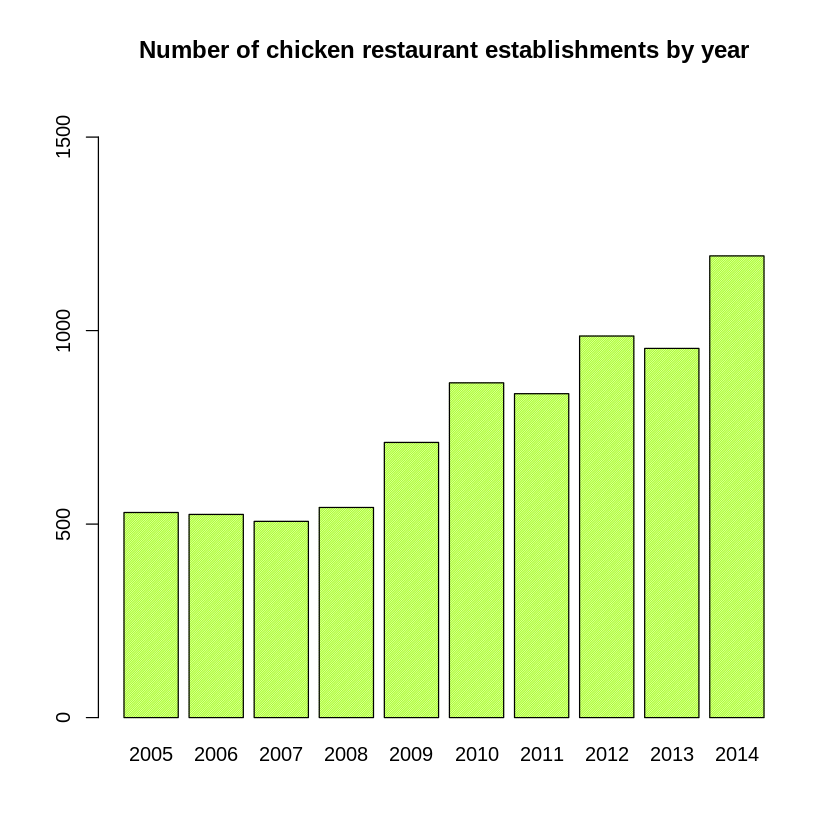

In [85]:
barplot( create_cnt$치킨집, main="Number of chicken restaurant establishments by year",
           names.arg=create_cnt$년도, col="Green Yellow", density=80, ylim=c(0,1600) )

문제133. 치킨집의 폐업건수로 막대그래프를 그리시오
		( 폐업건수.csv, x 축은 년도입니다.)

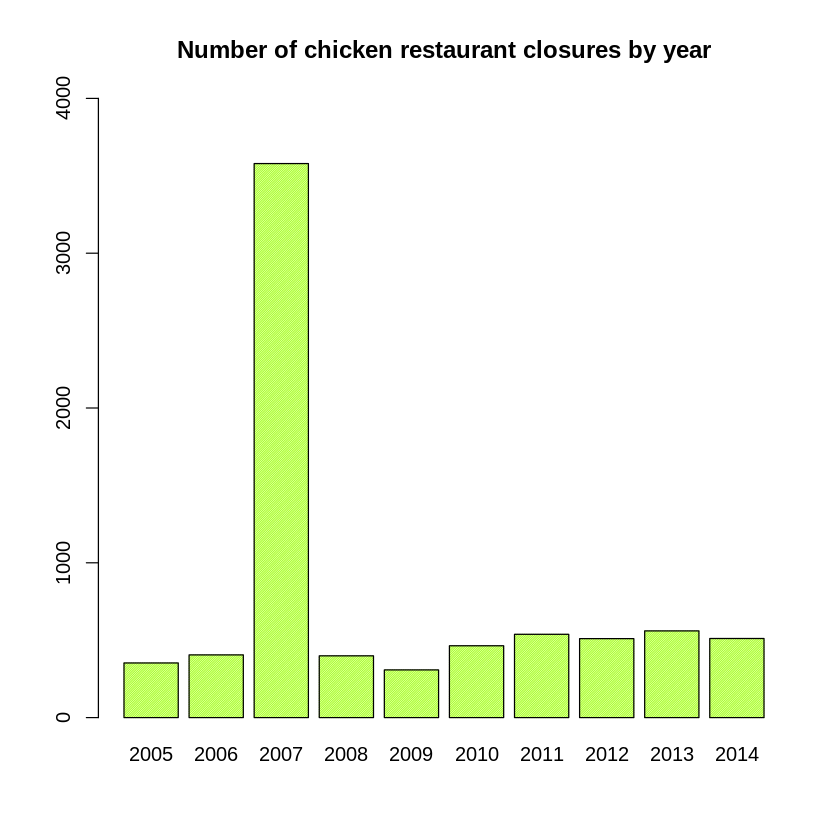

In [87]:
drop_cnt <- read.csv("폐업건수.csv", header=T)

barplot( drop_cnt$치킨집, main="Number of chicken restaurant closures by year",
           names.arg=drop_cnt$년도, col="Green Yellow", density=80, ylim=c(0, 4000) )

문제134. 치킨집의 창업건수와 폐업건수를 같이 막대그래프로 시각화 하시오 !


In [89]:
create_cnt <- read.csv("창업건수.csv", header=T)
drop_cnt <- read.csv("폐업건수.csv", header=T)
x <- rbind(create_cnt$커피음료, drop_cnt$커피음료)
x

454,483,575,772,845,1291,1671,1847,2287,3053
545,494,486,553,493,598,711,786,845,998


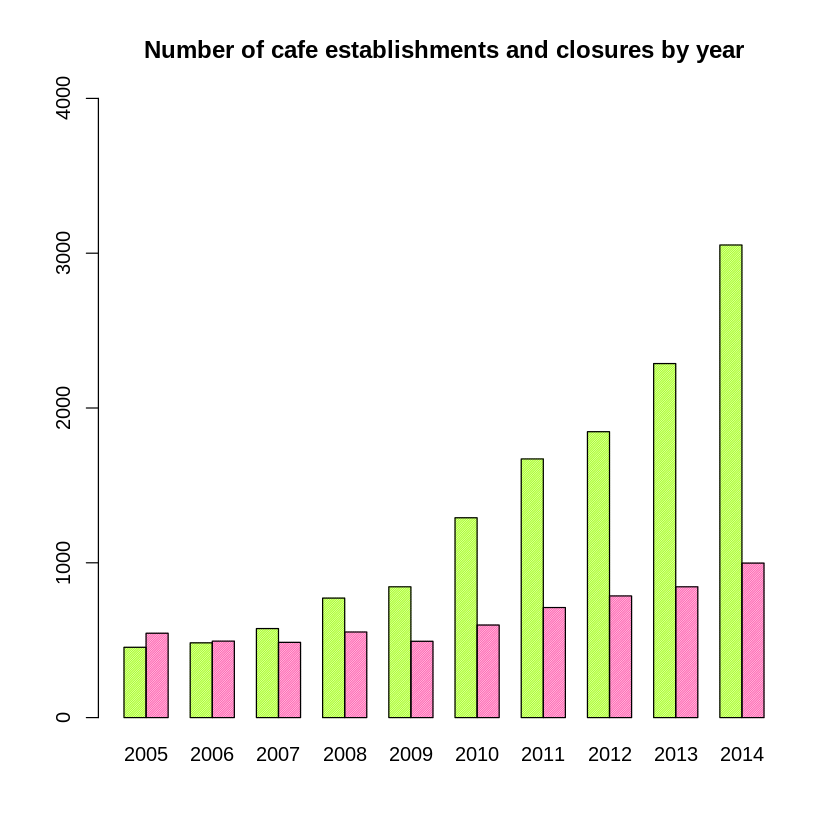

In [90]:
barplot( x, main="Number of cafe establishments and closures by year", 
           names.arg=drop_cnt$년도, col=c("Green Yellow", "Hot pink"),
            density=80, ylim=c(0, 4000), beside=T )

문제136. 위의 막대그래프를 앞으로 편하게 그릴 수 있도록 함수로 만들어서 실행되게 하시오 !

R 함수 생성 문법:

    함수명 <- function() {
                                 함수코드
                         }

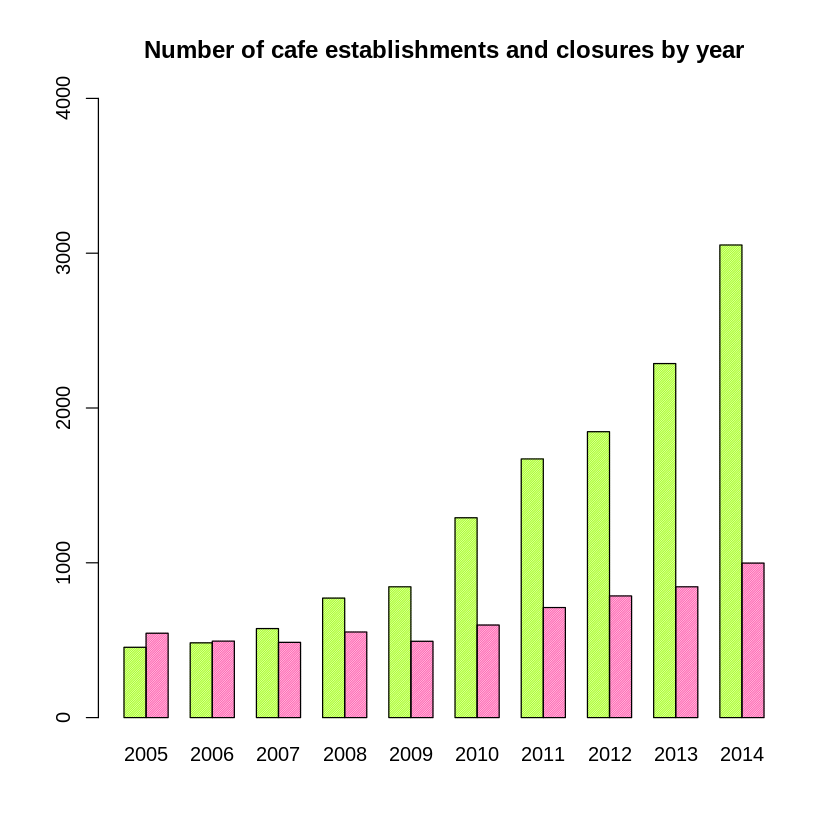

In [92]:
bar_auto <- function() {
             create_cnt <- read.csv("창업건수.csv", header=T)
             drop_cnt <- read.csv("폐업건수.csv", header=T)
             x <- rbind(create_cnt$커피음료, drop_cnt$커피음료)

            barplot( x, main="Number of cafe establishments and closures by year", 
                  names.arg=drop_cnt$년도, col=c("Green Yellow", "Hot pink"),
                   density=80, ylim=c(0, 4000), beside=T )
                           
                                }

bar_auto()

문제137. 창업건수.csv 를 로드해서 치킨집의 창업건수를 막대 그래프로 그리는 함수를 생성하시오 ~

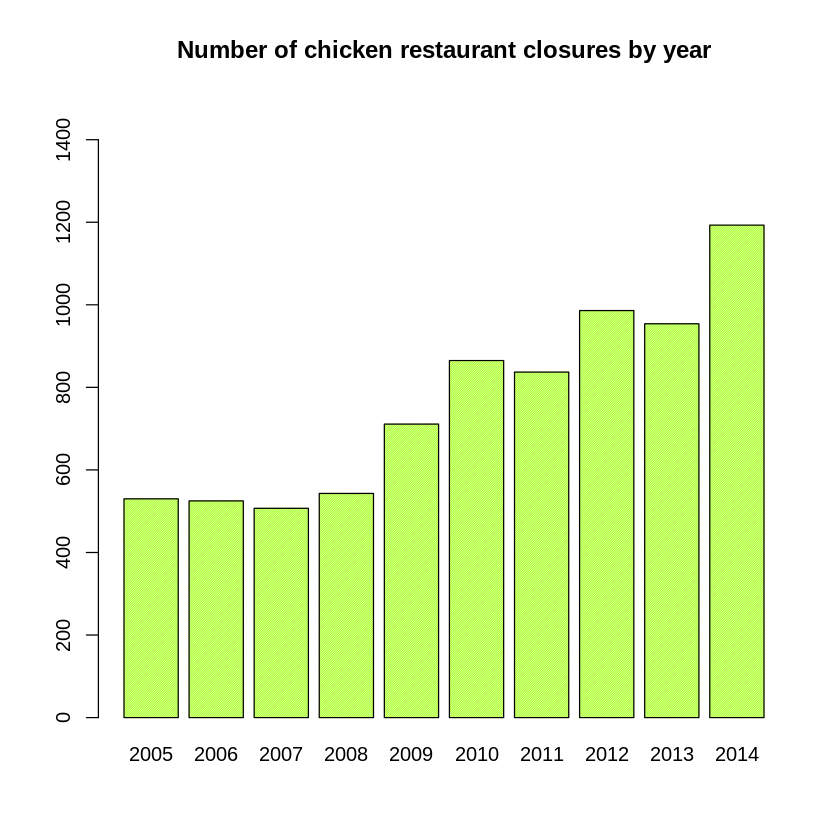

In [93]:
a_bar <- function() {
             create_cnt <- read.csv("창업건수.csv", header=T)

            barplot( create_cnt$치킨집, main="Number of chicken restaurant closures by year", 
                  names.arg=create_cnt$년도, col="Green Yellow",
                   density=80, ylim=c(0, 1500), beside=T )
                         }
a_bar()

**■ 원형 그래프 그리기**

문제138. 사원 테이블의 월급을 원형 그래프로 그리시오 !


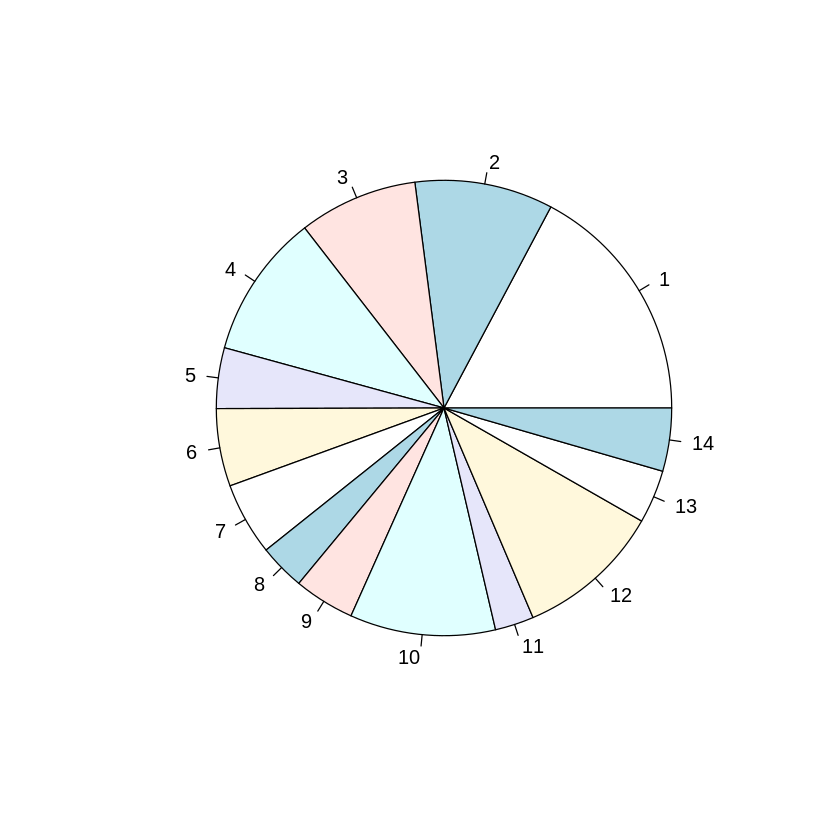

In [94]:
pie(emp$sal)

문제139. 위의 그래프를 다시 그리는데 누구의 월급인지가 명시되게하시오 !


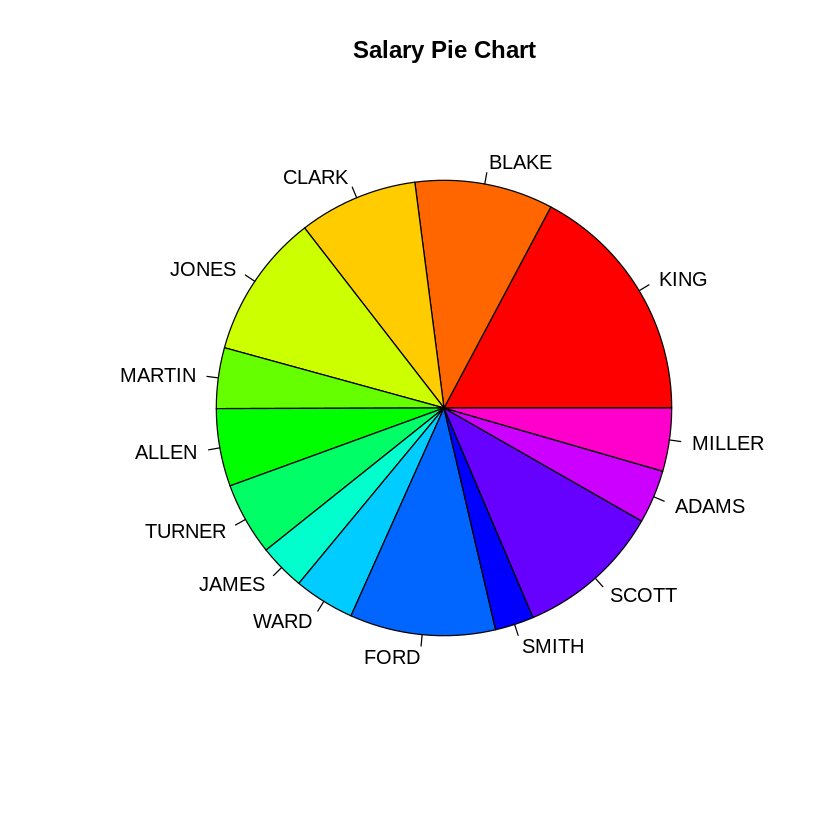

In [95]:
pie(emp$sal, main="Salary Pie Chart", labels=emp$ename, col=rainbow(15))

문제139. 위의 그래프의 월급에 비율을 붙여서 출력하시오 !


In [96]:
sal_labels <- round( emp$sal / sum(emp$sal) * 100, 1 )
sal_labels

[1] 17.2  9.8  8.4 10.2  4.3  5.5  5.2  3.3  4.3 10.3  2.8 10.3  3.8  4.5

In [97]:
sal_labels2 <- paste( emp$ename, sal_labels, '%')
sal_labels2

[1] "KING 17.2 %"  "BLAKE 9.8 %"  "CLARK 8.4 %"  "JONES 10.2 %" "MARTIN 4.3 %"
 [6] "ALLEN 5.5 %"  "TURNER 5.2 %" "JAMES 3.3 %"  "WARD 4.3 %"   "FORD 10.3 %" 
[11] "SMITH 2.8 %"  "SCOTT 10.3 %" "ADAMS 3.8 %"  "MILLER 4.5 %"

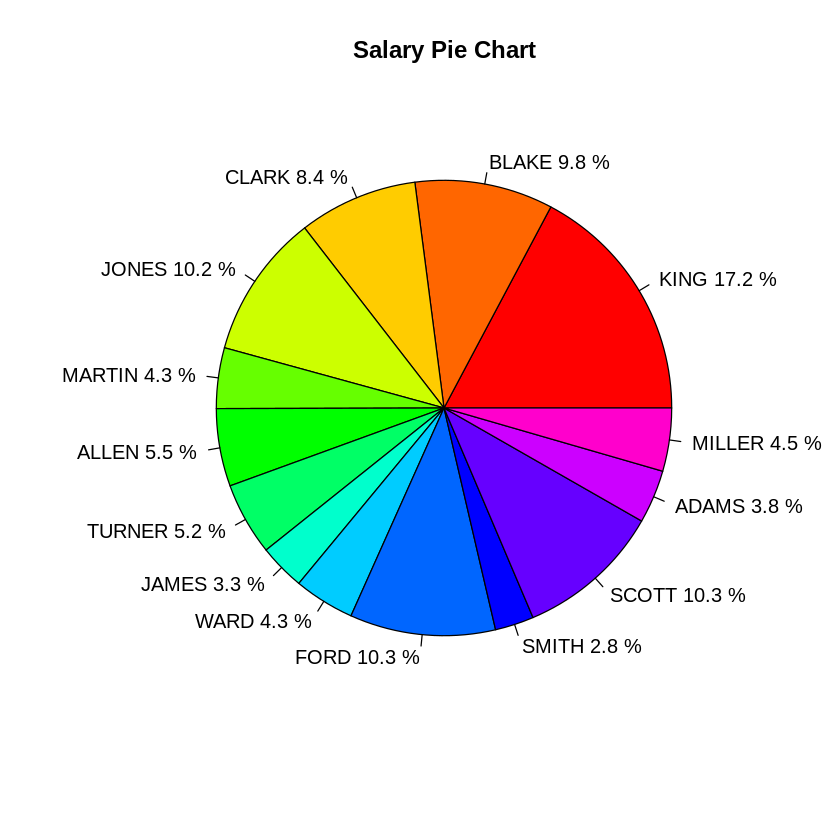

In [98]:
pie(emp$sal, main="Salary Pie Chart", labels=sal_labels2, col=rainbow(15))

**■ R 에서 라인 그래프 그리기**

시간 순서에 따른 데이터의 변화를 볼때 유용한 그래프


문제141. 아래의 데이터로 plot(점) 그래프를 그리시오 !

    cars <- c(1, 3, 6, 4, 9)

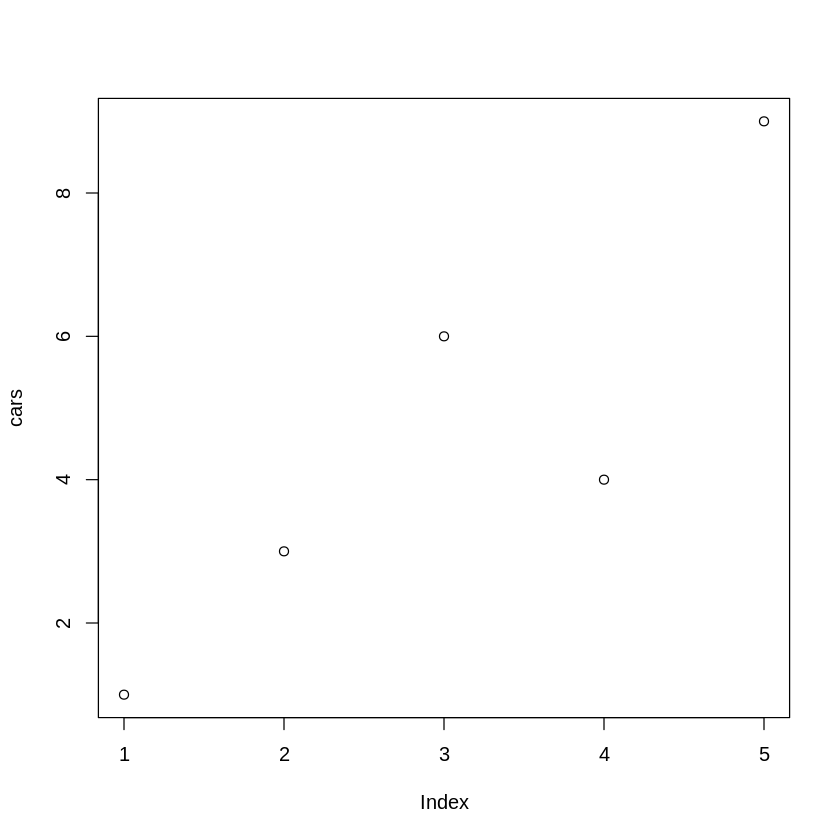

In [99]:
cars <- c(1, 3, 6, 4, 9)
plot(cars)

문제142. 위의 그래프에 파란색 선을 그리시오 !

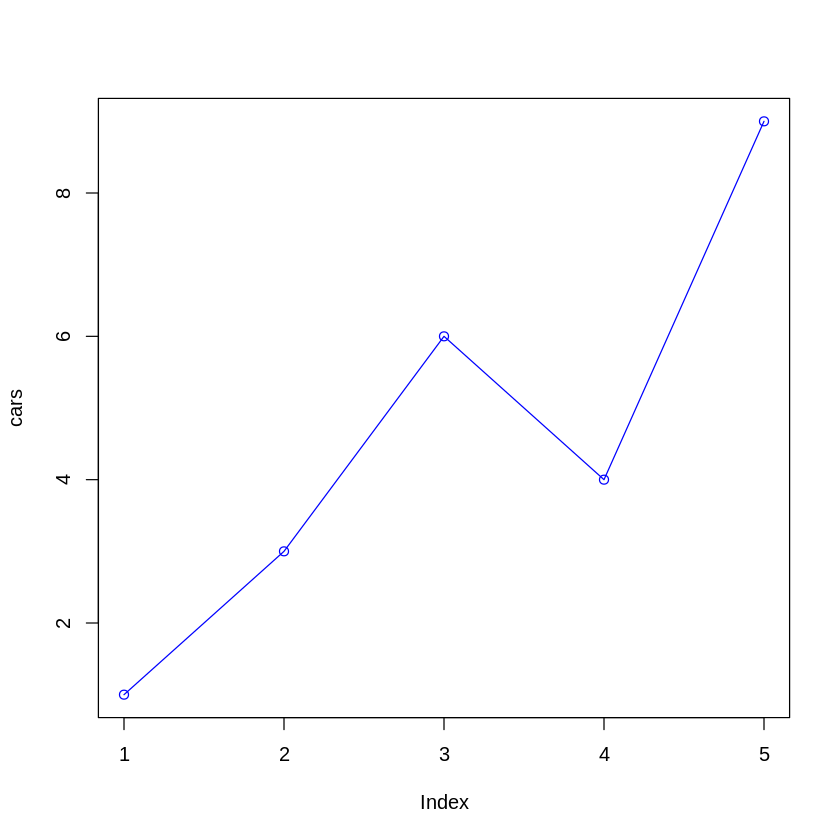

In [100]:
cars <- c(1, 3, 6, 4, 9)
plot(cars, type='o', col='blue')

설명:  type='o' : 선을 그어라

문제143. 차와 트럭의 판매된 갯수를 라인 그래프로 시각화 하시오 !


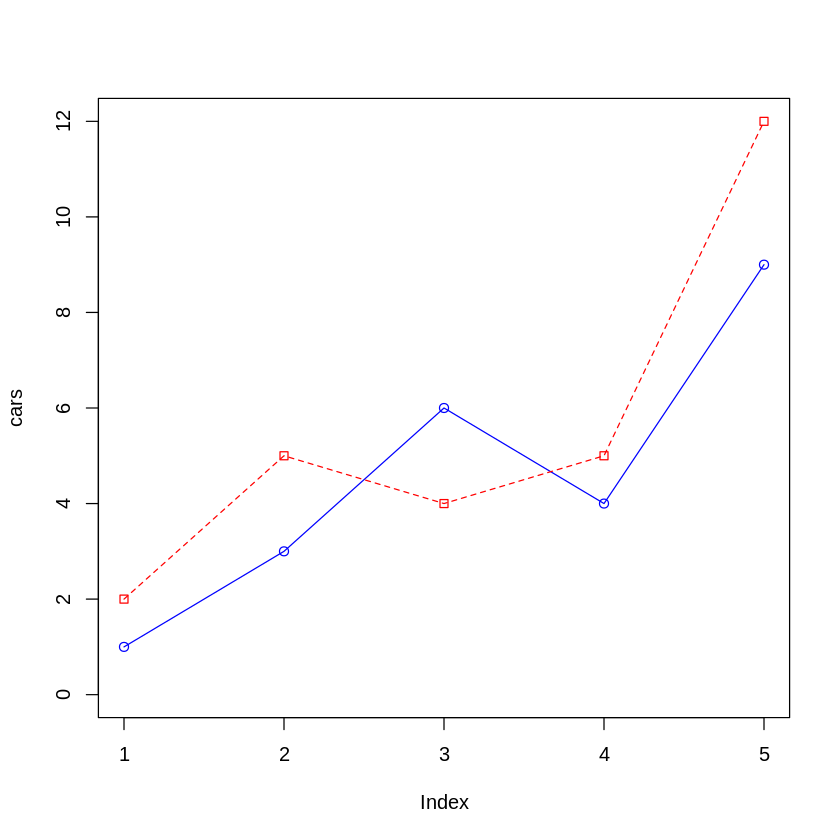

In [101]:
cars <- c(1, 3, 6, 4, 9)
trucks <- c(2, 5, 4, 5, 12)

plot( cars, type='o', col='blue', ylim=c(0,12) )

# 그래프의 창을 닫지 말고 바로 이어서 아래의 코드를 실행

lines( trucks, type='o', pch=22, lty=2, col='red')

설명: pch=21 : 동그라미, lty=1 : 직선
        pch=22 : 네모,      lty=2 : 점선

문제144. 가로축을 월, 화, 수, 목, 금 으로 변경하시오 !


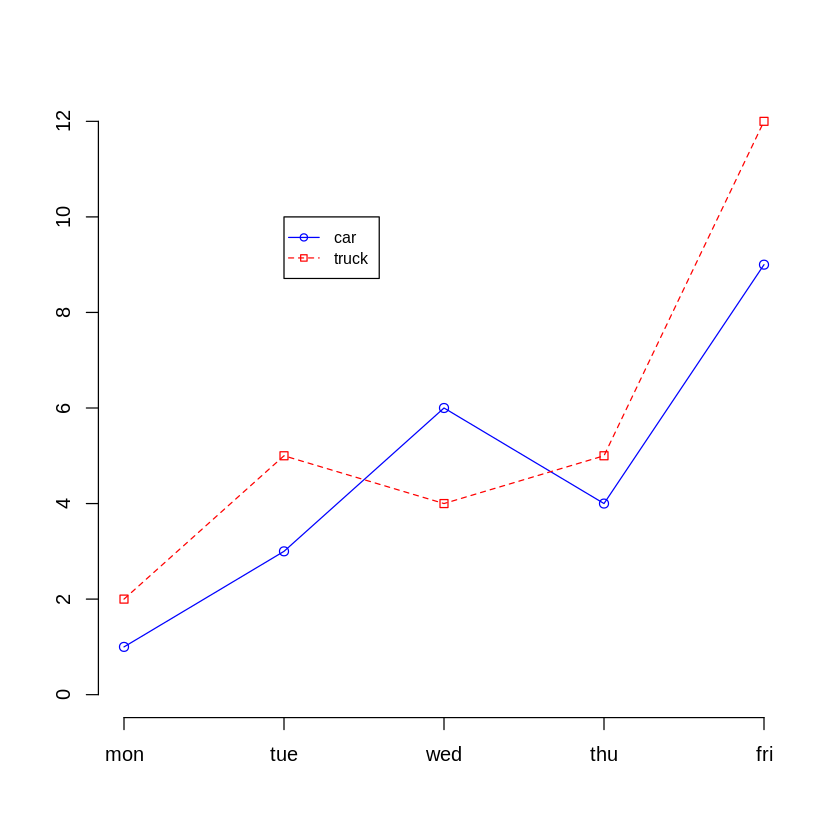

In [102]:
cars <- c(1, 3, 6, 4, 9)
trucks <- c(2, 5, 4, 5, 12)
plot( cars, type='o', col='blue', ylim=c(0,12), axes=FALSE, ann=FALSE )  # axes=FALSE : x 축과 y 축을 지워라
                                                                         # ann=FALSE : 축 이름을 지워라
lines( trucks, type='o', pch=22, lty=2, col='red')

axis( 1, at=1:5, lab=c("mon", "tue", "wed", "thu", "fri") )   # 새로운 축을 생성하는 방법
axis(2)  # y축 생성
legend( 2, 10, c('car', 'truck'), col=c('blue','red'), cex=0.8, pch=21:22, lty=1:2 )

설명: cex 는 글씨 크기, 레전드 안에 pch 21(동그라미), pch 22(네모), lty 1(직선), lty 2(점선) 을 표시한다.

문제145. 치킨집의 창업건수를 이용해서 라인 그래프를 그리시오 !
		x축을 연도로 두고 y축을 창업건수로 두고 만드시오 !


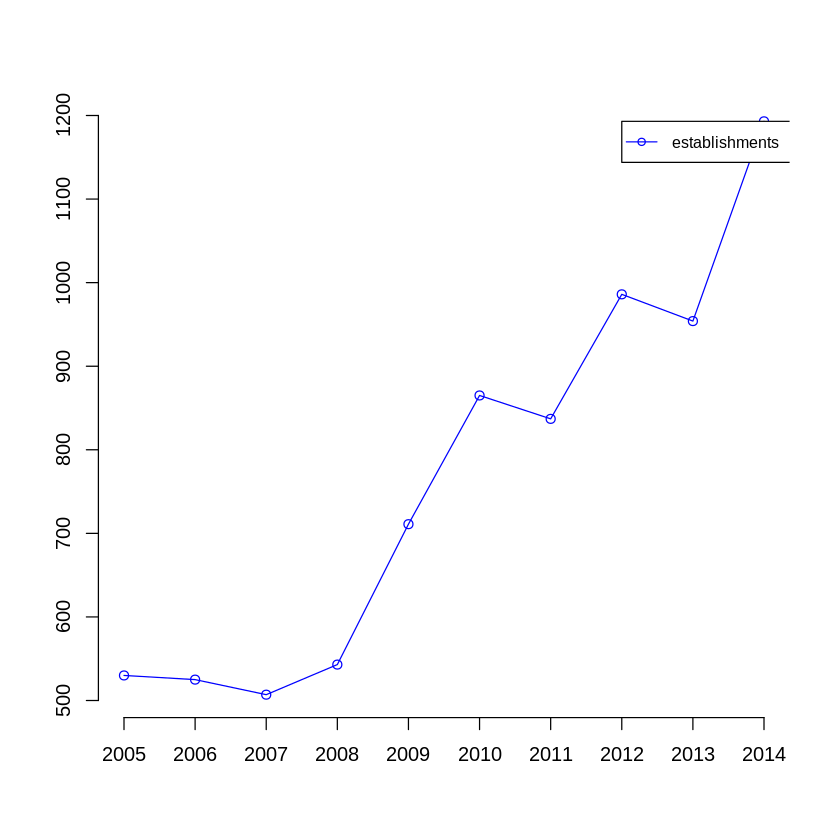

In [106]:
create_cnt <- read.csv("창업건수.csv", header=T)
plot( create_cnt$치킨집, type='o', col='blue', axes=FALSE, ann=FALSE )
axis( 1, at=1:10, lab=create_cnt$년도 )
axis(2)
legend( 8, max(create_cnt$치킨집), 'establishments', col='blue', cex=0.8, pch=21, lty=1 )

문제146. 치킨집의 창업건수와 폐업건수를 같이 출력되게 하시오 !
		(라인 그래프로 그리시오 !)

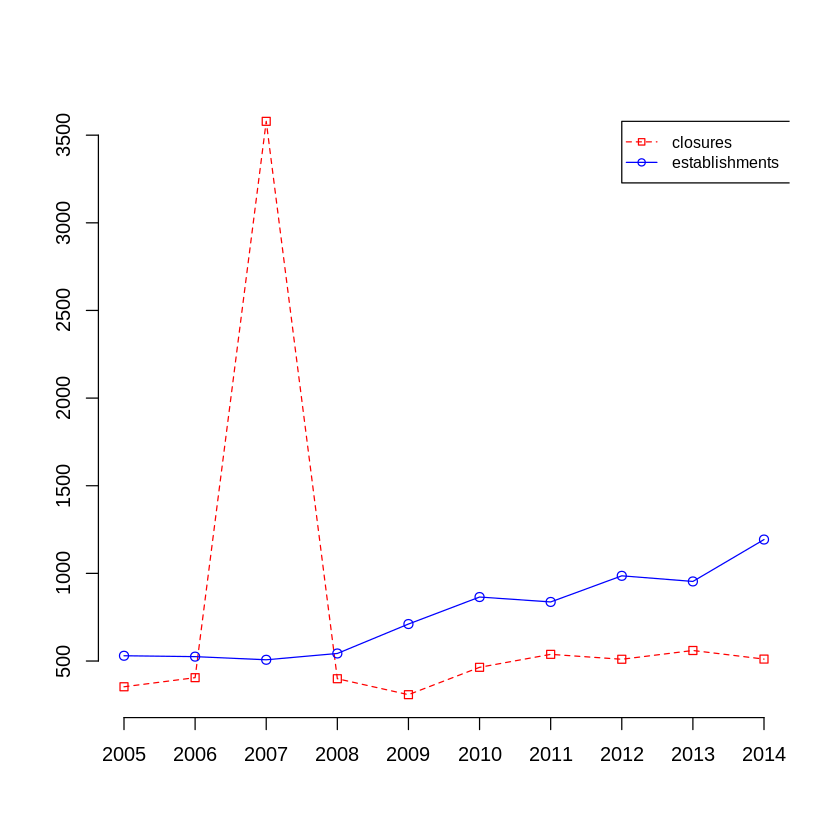

In [108]:
create_cnt <- read.csv("창업건수.csv", header=T)
drop_cnt <- read.csv("폐업건수.csv", header=T)

plot( drop_cnt$치킨집, type='o', col='red', axes=FALSE, ann=FALSE, pch=22, lty=2 )
lines( create_cnt$치킨집, type='o', col='blue', pch=21, lty=1 )

axis( 1,  at=1:10,  lab= create_cnt$년도 )
axis(2)
legend( 8, max(drop_cnt$치킨집) , c('closures','establishments') , col= c('red','blue'), cex=0.8,
           pch=22:21, lty=2:1  ) 

문제147. (오늘의 마지막 문제) 막대 그래프, 원형 그래프, 라인 그래프 이렇게 3가지를 그렸는데
		이 세가지 그래프를 쉽게 실행할 수 있도록 함수로 만드시오 ~

    auto_bar() : 창업/폐업 막대 그래프 실행
    auto_pie() : 사원 테이블의 월급 비율 원형 그래프 실행
    auto_line() : 창업/폐업 라인 그래프 실행


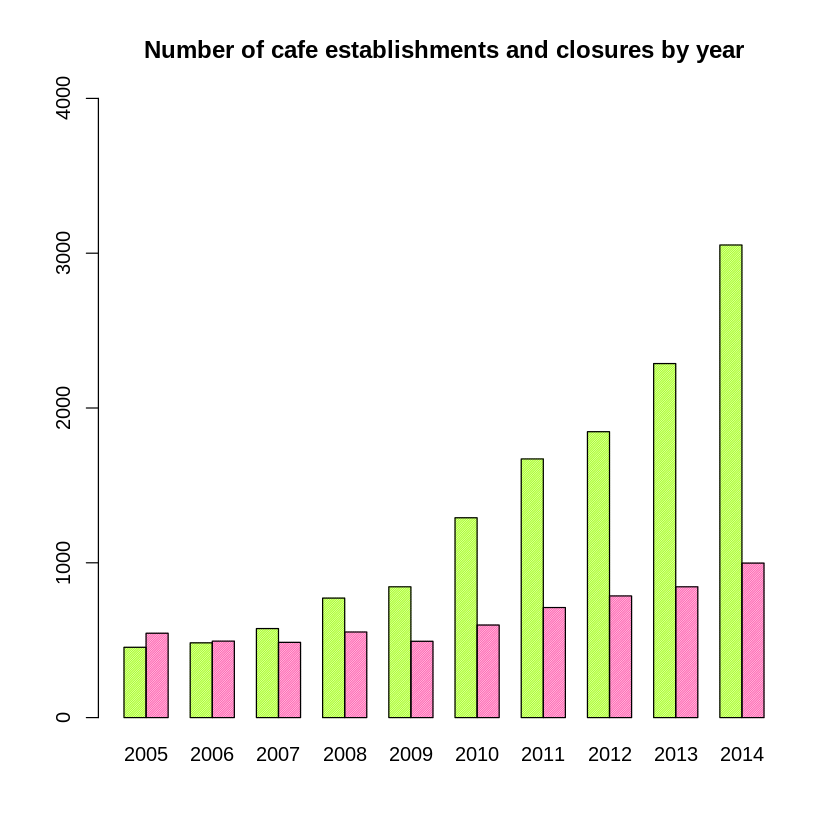

In [110]:
auto_bar <- function() {
  create_cnt <- read.csv("창업건수.csv", header=T)
  drop_cnt <- read.csv("폐업건수.csv", header=T)
  x <- rbind(create_cnt$커피음료, drop_cnt$커피음료)
  barplot( x, main="Number of cafe establishments and closures by year", 
           names.arg=drop_cnt$년도, col=c("Green Yellow", "Hot pink"),
           density=80, ylim=c(0, 4000), beside=T )
                       }

auto_bar()                

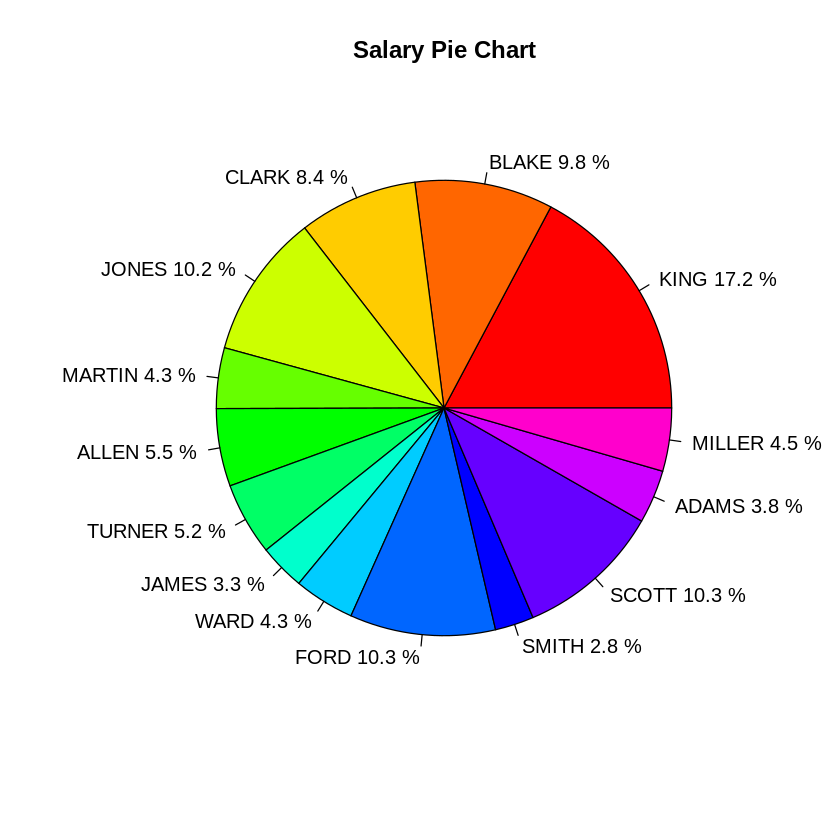

In [111]:
auto_pie <- function() {
  sal_labels <- round( emp$sal / sum(emp$sal) * 100, 1 )
  sal_labels2 <- paste( emp$ename, sal_labels, '%')
  pie(emp$sal, main="Salary Pie Chart", labels=sal_labels2, col=rainbow(15))
                       }

auto_pie()

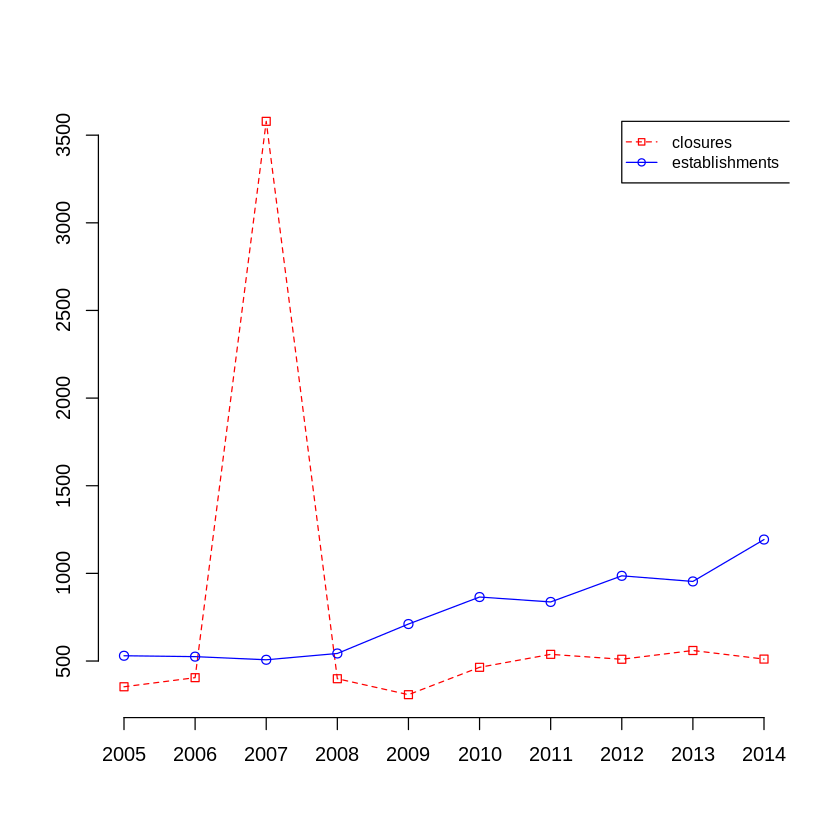

In [112]:
auto_line <- function() {
  create_cnt <- read.csv("창업건수.csv", header=T)
  drop_cnt <- read.csv("폐업건수.csv", header=T)
  plot( drop_cnt$치킨집, type='o', col='red', axes=FALSE, ann=FALSE, pch=22, lty=2 )
  lines( create_cnt$치킨집, type='o', col='blue', pch=21, lty=1 )
  axis( 1,  at=1:10,  lab= create_cnt$년도 )
  axis(2)
  legend( 8, max(drop_cnt$치킨집) , c('closures','establishments') , col= c('red','blue'), cex=0.8,
         pch=22:21, lty=2:1  ) 
                        }

auto_line()